<a href="https://colab.research.google.com/github/abhinam18/ML_project/blob/main/Car_price_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Load the data into the data frame

In [6]:
car_price= pd.read_csv("cardata11.csv", header=0)

In [7]:
car_price.head()

,CarName,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_price.tail()

,CarName,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [9]:
car_price.value_counts()

CarName            Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
fortuner           2015  23.00          30.61          40000       Diesel     Dealer       Automatic     0        2
ertiga             2016  7.75           10.79          43000       Diesel     Dealer       Manual        0        2
800                2003  0.35           2.28           127000      Petrol     Individual   Manual        0        1
ertiga             2015  6.10           7.71           26000       Petrol     Dealer       Manual        0        1
etios g            2014  4.75           6.76           40000       Petrol     Dealer       Manual        0        1
                                                                                                                 ..
Yamaha FZ S V 2.0  2015  0.55           0.84           58000       Petrol     Individual   Manual        0        1
                         0.48           0.84           23000       Petrol    

In [20]:
car_price.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
print(car_price.dtypes)

CarName           object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


Multiple linear regression model: Car price varies from different variable so i have to select this model

In [11]:
from sklearn.linear_model import LinearRegression

Linear Regression Object

In [12]:
lm = LinearRegression()
Z = car_price[['Kms_Driven', 'Owner','Present_Price','Year']]
lm.fit(Z, car_price['Selling_Price'])

LinearRegression()

In [13]:
lm.intercept_

-937.764222697808

In [14]:
lm.coef_

array([-1.26739896e-06, -9.51256110e-01,  5.25648695e-01,  4.66075947e-01])

Model Evaluation Using Visualization

In [15]:
import seaborn as sns
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

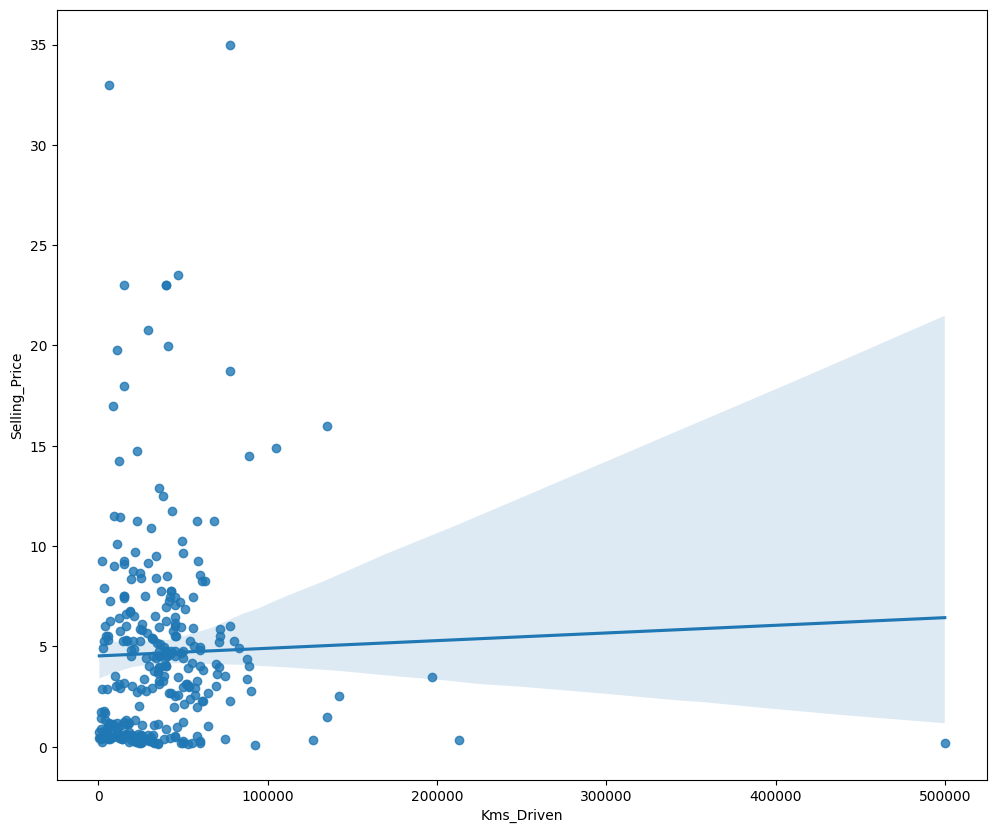

In [16]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Kms_Driven", y="Selling_Price", data=car_price)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

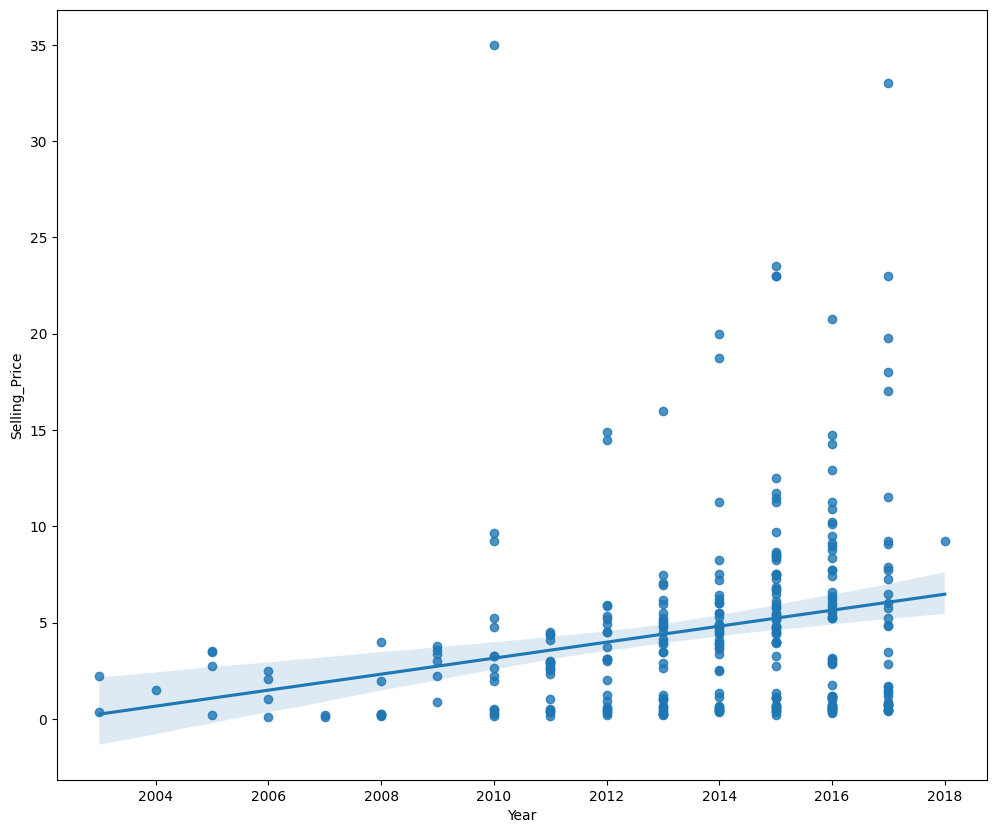

In [17]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Year", y="Selling_Price", data=car_price)
plt.show

In [18]:
car_price[["Kms_Driven","Year","Selling_Price"]].corr()

,Kms_Driven,Year,Selling_Price
Kms_Driven,1.000000,-0.524342,0.029187
Year,-0.524342,1.000000,0.236141
Selling_Price,0.029187,0.236141,1.000000


When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is : R square

In [24]:
#Kms_Driven_fit
lm.fit(Z, car_price['Selling_Price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, car_price['Selling_Price']))

The R-square is:  0.852192103644122


We saw that the model accuracy comes 85% it means model show the Selling price valuation on Kms driven correctely